In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [11]:
# Define dataset directories and parameters
base_dir = "dataset"  # Adjust this if your dataset folder is elsewhere

train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")
test_dir  = os.path.join(base_dir, "test")

batch_size = 32
img_height = 224
img_width = 224

In [12]:
# Load the datasets using image_dataset_from_directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode="categorical",  # Using categorical labels
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    label_mode="categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

# Get class names for later use
class_names = train_ds.class_names
print("Classes:", class_names)

Found 6927 files belonging to 26 classes.
Found 852 files belonging to 26 classes.
Found 854 files belonging to 26 classes.
Classes: ['Ant-Man', 'Aquaman', 'Batman', 'Black Adam', 'Black Panther', 'Black Widow', 'Blue Beetle', 'Captain America', 'Captain Marvel', 'Cyborg', 'Doctor Strange', 'Falcon', 'Hawkeye', 'Hulk', 'Iron Man', 'Scarlet Witch', 'Shang Chi', 'Shazam', 'Spiderman', 'Superman', 'The Flash', 'Thor', 'Vision', 'War Machine', 'Wasp', 'Wonder Woman']


In [4]:
# Configure dataset for performance with prefetch
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [5]:
# Build the CNN model
num_classes = len(class_names)

model = models.Sequential([
    # Rescaling: convert pixel values from [0, 255] to [0, 1]
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")
])

model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,941,786 (49.37 MB)

 Trainable params: 12,941,786 (49.37 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [7]:
# Train the model
epochs = 10  # Adjust the number of epochs as needed
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=epochs
)

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 124s 525ms/step - accuracy: 0.0642 - loss: 3.4204 - val_accuracy: 0.1948 - val_loss: 2.8293
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 105s 483ms/step - accuracy: 0.1734 - loss: 2.8763 - val_accuracy: 0.3110 - val_loss: 2.4370
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 107s 491ms/step - accuracy: 0.2770 - loss: 2.4943 - val_accuracy: 0.4613 - val_loss: 2.0093
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 106s 487ms/step - accuracy: 0.3995 - loss: 2.0539 - val_accuracy: 0.5000 - val_loss: 1.8351
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 104s 479ms/step - accuracy: 0.4707 - loss: 1.7846 - val_accuracy: 0.5352 - val_loss: 1.7537
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 104s 479ms/step - accuracy: 0.5430 - loss: 1.4934 - val_accuracy: 0.5563 - val_loss: 1.6867
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 103s 474ms/step - accuracy: 0.6070 - loss: 1.2333 - val_accuracy: 0.5692 - val_loss: 1.7244
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 103s 475ms/step - accuracy: 0.6581 -

In [8]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.5577 - loss: 1.8434
Test Accuracy: 58.55%


In [9]:
# Save the trained model to disk
model_save_path = "superhero_classifier_model.h5"
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to superhero_classifier_model.h5


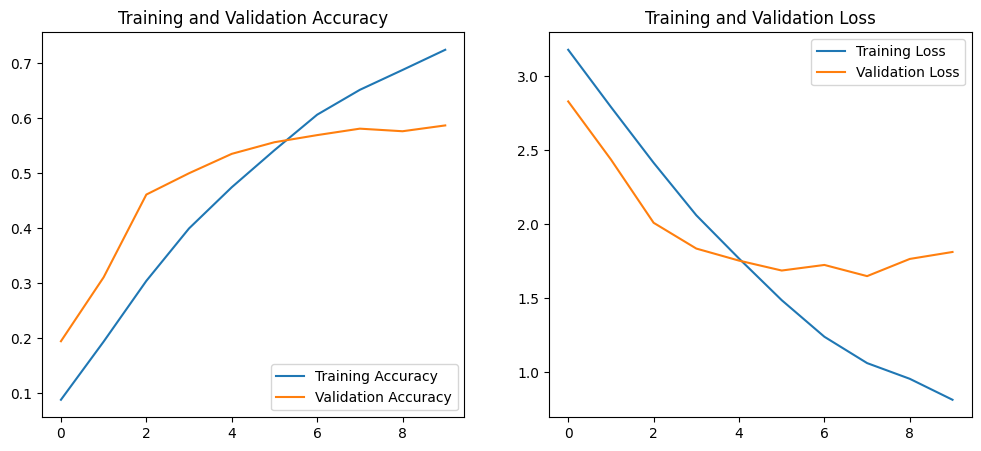

In [10]:
# Plot training vs. validation accuracy and loss if desired
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()